# Create and Insert Data to SQLite

In [237]:
# read tiff file
from spectral_tiffs import read_stiff, read_mtiff
import matplotlib.pyplot as plt
import plotly.express as px


# read tiff and mask tiff file 
tiff_path = "/Users/yusukemikami/Repos/IDP_2022_Project/data/Set 1, lower 10, icg.tiff"
spim, wavelengths, rgb, metadata = read_stiff(tiff_path)

mask_path = "/Users/yusukemikami/Repos/IDP_2022_Project/data/Set 1, lower 10, icg, mask.tiff"
masks = read_mtiff(mask_path)
np.array(list(masks.values())).astype(int).shape

(4, 1024, 1024)

In [238]:
## save data to sqlite
import sqlite3

conn = sqlite3.connect('hsi_database', detect_types=sqlite3.PARSE_DECLTYPES)
cursor = conn.cursor()

In [239]:
import sqlite3
import numpy as np
import io

def adapt_array(arr):
    out = io.BytesIO()
    np.save(out, arr)
    out.seek(0)
    return sqlite3.Binary(out.read())

def convert_array(text):
    out = io.BytesIO(text)
    out.seek(0)
    return np.load(out,allow_pickle=True)

# Converts np.array to TEXT when inserting
sqlite3.register_adapter(np.ndarray, adapt_array)

# Converts TEXT to np.array when selecting
sqlite3.register_converter("array", convert_array)

In [240]:
sql_create_table = """ CREATE TABLE IF NOT EXISTS tiff_table (
                                    id integer PRIMARY KEY,
                                    name text NOT NULL,
                                    spim array,
                                    rgb array,
                                    mask array
                                );"""
count = cursor.execute(sql_create_table)

count = cursor.execute("""delete from tiff_table""")


In [241]:
KEY_TIFF = "Stroma, ICG"
print("spim : ",spim.shape, "wavelengths : ",wavelengths.shape, "rgb : ",rgb.shape, "metadata : ",metadata, "masks : ",masks[KEY_TIFF].shape)

spim :  (1024, 1024, 37) wavelengths :  (37,) rgb :  (1024, 1024, 3) metadata :   masks :  (1024, 1024)


In [242]:
query = u'''insert into tiff_table VALUES(?,?,?,?,?)'''

cursor.execute(query,(1235,"icgtiff",spim,rgb, np.array(list(masks.values()))))
conn.commit()

In [243]:
cursor.execute("select id, spim from tiff_table")
data = cursor.fetchone()[1]
data

array([[[0.56728464, 1.        , 0.32721448, ..., 0.45803007,
         1.        , 1.        ],
        [0.6550851 , 0.7464408 , 0.49115738, ..., 0.        ,
         1.        , 0.        ],
        [0.3188983 , 0.78652626, 0.62769514, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [1.        , 1.        , 0.        , ..., 1.        ,
         0.12333868, 0.62298006],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.15179674, 1.        ],
        [0.32677194, 1.        , 0.        , ..., 0.34177157,
         0.38196385, 1.        ]],

       [[0.        , 0.30919355, 0.19928282, ..., 1.        ,
         1.        , 1.        ],
        [0.0936141 , 0.8742809 , 0.35654232, ..., 0.6032349 ,
         0.7989014 , 0.5979095 ],
        [0.6912032 , 0.47211415, 0.78356606, ..., 0.15803769,
         0.8647135 , 0.7550011 ],
        ...,
        [1.        , 1.        , 0.35567254, ..., 0.592401  ,
         0.38124666, 0.5911345 ],
        [0.9

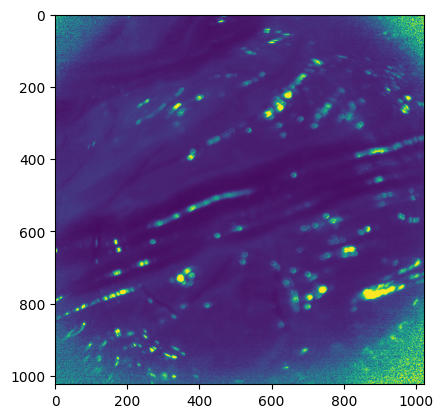

In [244]:
plt.imshow(data[:,:,0])

In [247]:
cursor.execute("select mask from tiff_table")
data = cursor.fetchone()[0]
data.shape

(4, 1024, 1024)